In [8]:
import pandas as pd
import numpy as np
import datetime 
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import seaborn as sns


#Import Click Data
Clicks = pd.read_csv('/Users/christiaanbecker/Downloads/bizcase/clicks_2.csv')

Clicksfil = Clicks['clicks'] < 13
Clicksfil2 = Clicks[Clicksfil].reset_index()






Cldrop = Clicksfil2.drop(['Unnamed: 0', 'adlinkType', 'adlinkTab', 'AdlinkBox', 'CountryName'], axis=1)
Cldrop.rename(index=str, columns={"AdlinkClickedDate": "Datum"},inplace = True)
Cldrop.head()




Cldrop.head()



,index,Datum,EntityID,DestinationName,partnerID,clicks
0,0,2018-03-01,209501,Pieve di Ledro (Lake Ledro),NaN,1
1,1,2018-03-01,325757,Nerja,NaN,1
2,2,2018-03-01,213806,Castagneto Carducci,NaN,1
3,3,2018-03-01,213806,Castagneto Carducci,NaN,1
4,4,2018-03-01,328355,Mataro,NaN,1


In [9]:
#Import and summarise page view data
pageviews = pd.read_csv('/Users/christiaanbecker/Downloads/bizcase/pageviews_2.csv')
pageviewsgrouped1 = pageviews.groupby (['entityID', 'DestinationName'])['uniquePageviews'].sum().to_frame('SumPgv').reset_index()



Con1 = pageviewsgrouped1['SumPgv'] > 30 
Con2 = pageviewsgrouped1['SumPgv'] < 867.5 

ConCom = Con1 & Con2
pageviewsgrouped = pageviewsgrouped1[ConCom].reset_index()



pageviewsgrouped.rename(index=str, columns={"entityID": "EntityID"},inplace = True)
pageviewsgrouped.head(40)

pageviewsgrouped.head()




#print pageviews['entityID'].count()
#print pageviewsgrouped['EntityID'].count()

,index,EntityID,DestinationName,SumPgv
0,0,121040,Alanya,253
1,2,121044,Alanya,38
2,3,121045,Alanya,133
3,4,121046,Alanya,44
4,5,121047,Incekum / Avsallar (nearby Alanya),43


In [10]:
#Import positions data and drop unnecessary columns
positions = pd.read_csv('/Users/christiaanbecker/Downloads/bizcase/positions_2.csv')
Posdroped = positions.drop(['Unnamed: 0', 'CountryName', 'level'], axis=1) 

In [11]:
#Question 1  
#Start by merging the position and clicks data
MergePos = pd.merge(Posdroped, Cldrop, how = 'outer', on = ['Datum','DestinationName', 'EntityID', 'partnerID'])
MergePos.head()

,Datum,EntityID,DestinationName,TourWebID,partnerID,CampaignItem,adlinks_position,index,clicks
0,2018-04-01,121040,Alanya,106161.0,1105.0,CPC UK,1.0,NaN,NaN
1,2018-04-01,121040,Alanya,106161.0,1108.0,CPC PL,1.0,NaN,NaN
2,2018-04-01,121040,Alanya,106161.0,1111.0,CPC COM,1.0,NaN,NaN
3,2018-04-01,121040,Alanya,106161.0,2220.0,CPC RO,1.0,NaN,NaN
4,2018-04-01,121040,Alanya,106161.0,3572.0,3,5.0,NaN,NaN


In [12]:
#Sum amount of clicks across positions



Posgrouped = MergePos.groupby ([ 'EntityID', 'partnerID', 'DestinationName', 'CampaignItem', 'adlinks_position'])['clicks'].sum().to_frame('SumClicks').reset_index()

#Drop NaNs
PGD = Posgrouped.dropna().reset_index()

In [13]:
#Combine dataset with pageview data and compute conversion rate
Fdf = pd.merge(PGD, pageviewsgrouped, how = 'outer', on = ['EntityID'])
Fdf['ConversionRate'] = (Fdf['SumClicks'] / Fdf['SumPgv'])*100
Fdf.head(500)

,index_x,EntityID,partnerID,DestinationName_x,CampaignItem,adlinks_position,SumClicks,index_y,DestinationName_y,SumPgv,ConversionRate
0,10.0,121040,339.0,Alanya,CPA BE,7.0,1.0,0.0,Alanya,253.0,0.395257
1,59.0,121040,2810.0,Alanya,CPC LT,1.0,1.0,0.0,Alanya,253.0,0.395257
2,65.0,121040,3261.0,Alanya,Hotel LB,12.0,1.0,0.0,Alanya,253.0,0.395257
3,66.0,121040,3261.0,Alanya,Hotel LB,13.0,1.0,0.0,Alanya,253.0,0.395257
4,69.0,121040,3381.0,Alanya,Vakantiediscounter NL,5.0,2.0,0.0,Alanya,253.0,0.790514
5,70.0,121040,3381.0,Alanya,Vakantiediscounter NL,6.0,2.0,0.0,Alanya,253.0,0.790514
6,71.0,121040,3381.0,Alanya,Vakantiediscounter NL,7.0,1.0,0.0,Alanya,253.0,0.395257
7,80.0,121040,3457.0,Alanya,CPC BE,5.0,2.0,0.0,Alanya,253.0,0.790514
8,87.0,121040,3520.0,Alanya,Corendon NL Prio 2 3520,1.0,13.0,0.0,Alanya,253.0,5.138340
9,95.0,121040,3572.0,Alanya,3,4.0,1.0,0.0,Alanya,253.0,0.395257


In [14]:
#Sum amount of clicks across positions
PosClicks = Fdf.groupby (['adlinks_position'])['SumClicks'].sum().to_frame('SumClicks').reset_index()

#Average conversion rate across positions
ConRate = Fdf.groupby (['adlinks_position'])['ConversionRate'].mean().to_frame('ConversionRate').reset_index()


#Postion percentages
PosClicks['SumClPer'] = (PosClicks['SumClicks'] / PosClicks['SumClicks'].sum())*100

#Merge percentages
Ques1 = pd.merge(PosClicks, ConRate, how = 'outer', on = ['adlinks_position'])
Ques1.head(27)

#print Ques1['ConversionRate'].mean()

,adlinks_position,SumClicks,SumClPer,ConversionRate
0,1.0,243532.0,35.200828,3.315565
1,2.0,104852.0,15.155615,1.838947
2,3.0,67809.0,9.801311,1.353235
3,4.0,51806.0,7.488191,1.134130
4,5.0,42603.0,6.157962,0.973117
5,6.0,37090.0,5.361097,0.873839
6,7.0,29853.0,4.315040,0.753258
7,8.0,24884.0,3.596806,0.675169
8,9.0,22166.0,3.203939,0.599832
9,10.0,19095.0,2.760047,0.561304


In [15]:
#Question 2
#Sum amount of clicks across EntityID and partnerID
Clsum = Cldrop.groupby (['EntityID','partnerID'])['clicks'].sum().to_frame('ClickSum').reset_index()
Clsum.head()


#Merge new dataframe with Pageviews
MrgClPgview = pd.merge(Clsum, pageviewsgrouped, how = 'outer', on = ['EntityID'])
MrgClPgview.head()

#Workout conversion rate per entity by partner. 
MrgClPgview['ConversionRate'] = (MrgClPgview['ClickSum'] / MrgClPgview['SumPgv'])*100

#Sort Dataframe by pageviews (Most on top)
#MrgClPgview.sort_values(by=['SumPgv'], ascending=False, inplace=True)

#Select top 30 most viewed accomadations
#MrgClPgviewDr = MrgClPgview[:360]

# Get grand mean of conversion rate
MrgClPgviewDrMean = MrgClPgview['ConversionRate'].mean()
print MrgClPgviewDrMean

#Mean conveersion rate per partner ranked
MeanperPart = MrgClPgview.groupby (['partnerID'])['ConversionRate'].mean().to_frame('ConversionRate').reset_index()
Ques2 = MeanperPart.sort_values(by=['ConversionRate'], ascending=False).reset_index()

Ques2.head()


2.40045681171


,index,partnerID,ConversionRate
0,88,1531.0,24.031986
1,185,3310.0,14.676696
2,10,195.0,14.224463
3,174,3295.0,9.115843
4,251,3520.0,7.523664


In [16]:
#Question3
#Merge Click, posistion and pageview data
MergeAlldata = pd.merge(MergePos, pageviewsgrouped, how = 'outer', on = ['EntityID'])
MergeAlldata.head()

,Datum,EntityID,DestinationName_x,TourWebID,partnerID,CampaignItem,adlinks_position,index_x,clicks,index_y,DestinationName_y,SumPgv
0,2018-04-01,121040,Alanya,106161.0,1105.0,CPC UK,1.0,NaN,NaN,0.0,Alanya,253.0
1,2018-04-01,121040,Alanya,106161.0,1108.0,CPC PL,1.0,NaN,NaN,0.0,Alanya,253.0
2,2018-04-01,121040,Alanya,106161.0,1111.0,CPC COM,1.0,NaN,NaN,0.0,Alanya,253.0
3,2018-04-01,121040,Alanya,106161.0,2220.0,CPC RO,1.0,NaN,NaN,0.0,Alanya,253.0
4,2018-04-01,121040,Alanya,106161.0,3572.0,3,5.0,NaN,NaN,0.0,Alanya,253.0


In [98]:
#Find partner count across EntityID, pageviews and Destination
CountSpread = MergeAlldata.groupby (['EntityID', 'SumPgv', 'DestinationName_x'])['partnerID'].nunique().to_frame('PartnerCount').reset_index()

#Devide partner count by pageviews and sort
CountSpread['ConversionRate'] = (CountSpread['PartnerCount'] / CountSpread['SumPgv'])
CountSpread.sort_values(by=['ConversionRate'], ascending=False, inplace=True)


#correlate page views and partner count
Question3 = CountSpread['SumPgv'].corr(CountSpread['PartnerCount'])
print Question3

#Identify 20 cases of skewed ratios
CountSpread.head(243)



0.18929897927495504


,EntityID,SumPgv,DestinationName_x,PartnerCount,ConversionRate
5259,306523,31.0,Camp de Mar,61,1.967742
3085,292814,32.0,Palma,62,1.937500
5715,310968,31.0,Benidorm,60,1.935484
502,124842,32.0,Kemer - Tekirova - Kiris,61,1.906250
522,126954,31.0,Marmaris,57,1.838710
6906,359751,32.0,Fuengirola,58,1.812500
4093,299843,33.0,Illetas,59,1.787879
4069,299803,33.0,Alcudia / Puerto de Alcudia,59,1.787879
51,121187,32.0,Alanya,57,1.781250
3978,296130,32.0,Puerto del Carmen,56,1.750000


In [128]:
#Question 4
#Create new feature which measures competion vs popularity
CountSpread['CompetionIndex'] = CountSpread['SumPgv']/CountSpread['PartnerCount']
CountSpread.head(6290)

,EntityID,SumPgv,DestinationName_x,PartnerCount,ConversionRate,CompetionIndex
5259,306523,31.0,Camp de Mar,61,1.967742,0.508197
3085,292814,32.0,Palma,62,1.937500,0.516129
5715,310968,31.0,Benidorm,60,1.935484,0.516667
502,124842,32.0,Kemer - Tekirova - Kiris,61,1.906250,0.524590
522,126954,31.0,Marmaris,57,1.838710,0.543860
6906,359751,32.0,Fuengirola,58,1.812500,0.551724
4093,299843,33.0,Illetas,59,1.787879,0.559322
4069,299803,33.0,Alcudia / Puerto de Alcudia,59,1.787879,0.559322
51,121187,32.0,Alanya,57,1.781250,0.561404
3978,296130,32.0,Puerto del Carmen,56,1.750000,0.571429


In [17]:
#Indentify accomodations with the highest values on the competition index for each destination
def most_popular(group, n_max=5):
    relevance = group['CompetionIndex'].values
    hotel_cluster = group['EntityID'].values
    most_popular = hotel_cluster[np.argsort(relevance)[::-1]][:n_max]
    return np.array_str(most_popular)[1:-1]

most_pop = CountSpread.groupby(['DestinationName_x']).apply(most_popular)
most_pop = pd.DataFrame(most_pop).rename(columns={0:'EntityID'})
most_pop.head(1000)

,EntityID
DestinationName_x,
Abano Terme,193785 182283 195478
Abbadia Lariana,362331
Abejar,351661
Abizanda,307594
Acireale,191783 188356 193687 337477
Acquapendente,916151
Acquaviva,186018 189870
Acqui Terme,908369 182168 191797
Agaete,300503 332747


In [18]:
#Question 5
#Create new month column
pageviews['DatumS'] = pd.to_datetime(pageviews["Date"], format='%Y-%m-%d')
pageviews['Month'] = pd.DatetimeIndex(pageviews['DatumS']).month

#Sum pageviews across Month, DestinationName and entityID
pageviewsgroupedDa = pageviews.groupby (['Month', 'DestinationName', 'entityID' ])['uniquePageviews'].sum().to_frame('SumPgv').reset_index()

#Combine month and destination into one variable
pageviewsgroupedDa["Combined"] = pageviewsgroupedDa["Month"].map(str) + "/" + pageviewsgroupedDa["DestinationName"]
pageviewsgroupedDa.columns = [ 'Month','DestinationName','entityID','SumPgv','Combined']

pageviewsgroupedDa.head()

,Month,DestinationName,entityID,SumPgv,Combined
0,3,Abano Terme,182283,34,3/Abano Terme
1,3,Abano Terme,182286,2,3/Abano Terme
2,3,Abano Terme,182289,5,3/Abano Terme
3,3,Abano Terme,182294,3,3/Abano Terme
4,3,Abano Terme,188121,1,3/Abano Terme


In [19]:
#Calculate most popular accomadations for each combined month/Destination feature
def most_popular(group, n_max=5):
    relevance = group['SumPgv'].values
    hotel_cluster = group['entityID'].values
    most_popular = hotel_cluster[np.argsort(relevance)[::-1]][:n_max]
    return np.array_str(most_popular)[1:-1]

most_pop = pageviewsgroupedDa.groupby(['Combined']).apply(most_popular)
most_pop = pd.DataFrame(most_pop).rename(columns={0:'entityID'})
most_pop.head(1000)

,entityID
Combined,
3/Abano Terme,193785 182283 195478 213948 193787
3/Abbadia Lariana,362331 198100
3/Abbadia San Salvatore,177680
3/Abbasanta,192525
3/Abbateggio,210460 210790
3/Abejar,351661 307620 307621
3/Abetone,208866 351577 212304
3/Abizanda,307594
3/Acaya,179085


In [20]:
#Seperate features
most_pop.reset_index(inplace=True)
most_pop[['Month','Destination']] = most_pop['Combined'].str.split('/', n=1,expand=True)
most_pop.head(6000)

,Combined,entityID,Month,Destination
0,3/Abano Terme,193785 182283 195478 213948 193787,3,Abano Terme
1,3/Abbadia Lariana,362331 198100,3,Abbadia Lariana
2,3/Abbadia San Salvatore,177680,3,Abbadia San Salvatore
3,3/Abbasanta,192525,3,Abbasanta
4,3/Abbateggio,210460 210790,3,Abbateggio
5,3/Abejar,351661 307620 307621,3,Abejar
6,3/Abetone,208866 351577 212304,3,Abetone
7,3/Abizanda,307594,3,Abizanda
8,3/Acaya,179085,3,Acaya
9,3/Acciaroli/Cannicchio,925179,3,Acciaroli/Cannicchio


In [66]:
Clicks = pd.read_csv('/Users/christiaanbecker/Downloads/bizcase/clicks_2.csv')

Clicks.head()

,Unnamed: 0,AdlinkClickedDate,EntityID,DestinationName,CountryName,partnerID,adlinkType,adlinkTab,AdlinkBox,clicks
0,1,2018-03-01,209501,Pieve di Ledro (Lake Ledro),Italy,NaN,acco-website,NaN,NaN,1
1,2,2018-03-01,325757,Nerja,Spain,NaN,acco-website,NaN,NaN,1
2,3,2018-03-01,213806,Castagneto Carducci,Italy,NaN,acco-website,NaN,NaN,1
3,4,2018-03-01,213806,Castagneto Carducci,Italy,NaN,acco-website,NaN,NaN,1
4,5,2018-03-01,328355,Mataro,Spain,NaN,acco-website,NaN,NaN,1


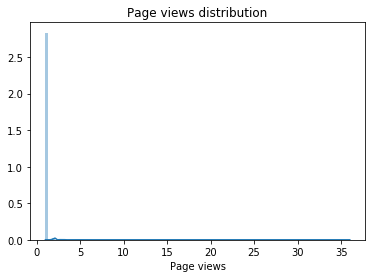

In [88]:
sns.distplot(Clicks['clicks'], bins = 100,  norm_hist = True)
plt.title("Page views distribution")
plt.xlabel('Page views')

plt.show()

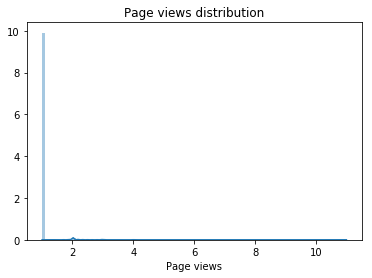

In [89]:
sns.distplot(Cldrop['clicks'], bins = 100,  norm_hist = True)
plt.title("Page views distribution")
plt.xlabel('Page views')

plt.show()

In [90]:
Cldrop.head()

,index,Datum,EntityID,DestinationName,partnerID,clicks
0,0,2018-03-01,209501,Pieve di Ledro (Lake Ledro),NaN,1
1,1,2018-03-01,325757,Nerja,NaN,1
2,2,2018-03-01,213806,Castagneto Carducci,NaN,1
3,3,2018-03-01,213806,Castagneto Carducci,NaN,1
4,4,2018-03-01,328355,Mataro,NaN,1


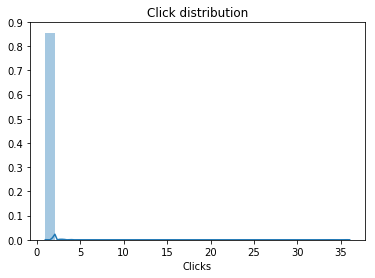

In [91]:
sns.distplot(Clicks['clicks'], bins = 30)
plt.title("Click distribution")
plt.xlabel('Clicks')

plt.show()

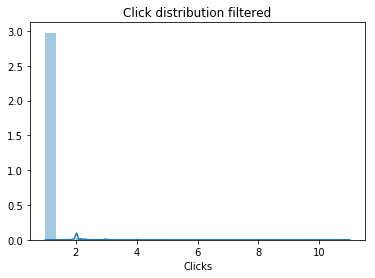

In [92]:
sns.distplot(Cldrop['clicks'], bins = 30)
plt.title("Click distribution filtered")
plt.xlabel('Clicks')

plt.show()

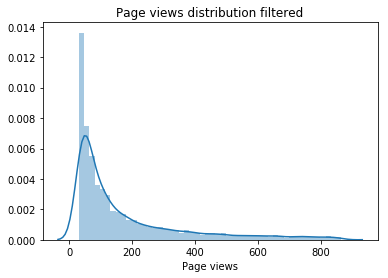

In [93]:
sns.distplot(pageviewsgrouped['SumPgv'], bins = 50,  norm_hist = True)
plt.title("Page views distribution filtered")
plt.xlabel('Page views')

plt.show()

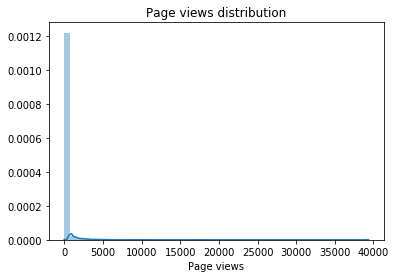

In [75]:
sns.distplot(pageviewsgrouped1['SumPgv'], bins = 50,  norm_hist = True)
plt.title("Page views distribution")
plt.xlabel('Page views')

plt.show()

In [146]:
FdfP = Fdf['partnerID'] == 1531.0
FdfPID = Fdf[FdfP]
FdfPID.head(30)

,index_x,EntityID,partnerID,DestinationName_x,CampaignItem,adlinks_position,SumClicks,index_y,DestinationName_y,SumPgv,ConversionRate
73937,826046.0,302384,1531.0,Javea,Touroperator CPC NL,1.0,7.0,NaN,NaN,NaN,NaN
96425,1019470.0,314848,1531.0,Javea,Touroperator CPC NL,2.0,1.0,NaN,NaN,NaN,NaN
96427,1019481.0,314849,1531.0,Javea,Touroperator CPC NL,1.0,2.0,NaN,NaN,NaN,NaN
96933,1034293.0,318485,1531.0,Javea,Touroperator CPC NL,2.0,1.0,NaN,NaN,NaN,NaN
97582,1062102.0,321692,1531.0,Javea,Touroperator CPC NL,2.0,1.0,NaN,NaN,NaN,NaN
97588,1064178.0,321812,1531.0,Javea,Touroperator CPC NL,1.0,1.0,NaN,NaN,NaN,NaN
97590,1064232.0,321818,1531.0,Javea,Touroperator CPC NL,1.0,1.0,NaN,NaN,NaN,NaN
97592,1064357.0,321830,1531.0,Javea,Touroperator CPC NL,1.0,83.0,27761.0,Javea,359.0,23.119777
97594,1064576.0,321855,1531.0,Javea,Touroperator CPC NL,1.0,1.0,NaN,NaN,NaN,NaN
97595,1064632.0,321862,1531.0,Javea,Touroperator CPC NL,2.0,2.0,NaN,NaN,NaN,NaN


In [30]:
#Sum amount of clicks across positions
PosClicksPID = FdfPID.groupby (['adlinks_position'])['SumClicks'].sum().to_frame('SumClicks').reset_index()

#Average conversion rate across positions
ConRatePID = FdfPID.groupby (['adlinks_position'])['ConversionRate'].mean().to_frame('ConversionRate').reset_index()


#Postion percentages
PosClicksPID['SumClPer'] = (PosClicksPID['SumClicks'] / PosClicksPID['SumClicks'].sum())*100

#Merge percentages
Ques1 = pd.merge(PosClicksPID, ConRatePID, how = 'outer', on = ['adlinks_position'])
Ques1.head(27)

,adlinks_position,SumClicks,SumClPer,ConversionRate
0,1.0,125.0,90.57971,15.622033
1,2.0,13.0,9.42029,6.504065


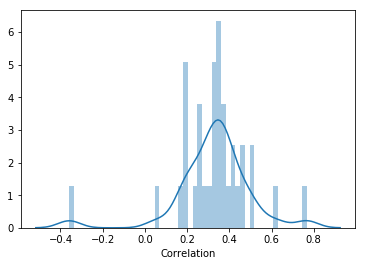

0.32737435460415937
35


,EntityID,SumPgv,DestinationName_x,PartnerCount
0,121040,253.0,Alanya,62
1,121045,133.0,Alanya,62
2,121046,44.0,Alanya,7
3,121047,43.0,Incekum / Avsallar (nearby Alanya),5
4,121050,47.0,Alanya,50


In [17]:
MergeAlldataDr = MergeAlldata.drop(columns=['Datum', 'TourWebID', 'CampaignItem', 'index_x', 'DestinationName_y', 'adlinks_position', 'index_y', 'clicks'])
data = MergeAlldataDr.dropna(subset=['partnerID'])
data2 = data.dropna(subset=['SumPgv'])
CountSpread2 = data2.groupby (['EntityID', 'SumPgv', 'DestinationName_x'])['partnerID'].nunique().to_frame('PartnerCount').reset_index()


Cordr = CountSpread2.groupby('DestinationName_x')[['SumPgv','PartnerCount']].corr(min_periods = 30).reset_index()
CordrD = Cordr.dropna().reset_index()

CordrD.head(1000)




W = CordrD['SumPgv'].values


del_arr = np.delete(W, np.where(W == [1]))
#print del_arr

#sns.distplot(del_arr, bins = 50,  norm_hist = True)

#plt.xlabel('Correlation')

#plt.show()

CordrD.head()

print np.mean(del_arr)


print CordrD['DestinationName_x'].nunique()
#print CountSpread['DestinationName_x'].nunique()


#PosClicks = Fdf.groupby (['adlinks_position'])['SumClicks'].sum().

Cordr.head(1000)

CountSpread2.head()


In [32]:
MergeAlldataDr = MergeAlldata.drop(columns=['DestinationName_x', 'TourWebID', 'CampaignItem', 'index_x', 'DestinationName_y', 'adlinks_position', 'index_y', 'clicks'])
#data = MergeAlldataDr.dropna(subset=['partnerID'])
#data2 = data.dropna(subset=['SumPgv'])
#CountSpread2 = data2.groupby (['EntityID', 'SumPgv', 'DestinationName_x'])['partnerID'].nunique().to_frame('PartnerCount').reset_index()

In [45]:
MergeAlldataDr.head()

data1 = MergeAlldataDr.dropna(subset=['partnerID'])
data3 = data1.dropna(subset=['SumPgv'])

R = data3.fillna(0)

R['DatumS'] = pd.to_datetime(R["Datum"], format='%Y-%m-%d')
R['Month'] = pd.DatetimeIndex(R['DatumS']).month


R.head()


,Datum,EntityID,partnerID,SumPgv,DatumS,Month
0,2018-04-01,121040,1105.0,253.0,2018-04-01,4
1,2018-04-01,121040,1108.0,253.0,2018-04-01,4
2,2018-04-01,121040,1111.0,253.0,2018-04-01,4
3,2018-04-01,121040,2220.0,253.0,2018-04-01,4
4,2018-04-01,121040,3572.0,253.0,2018-04-01,4


In [41]:
R['DatumS'] = pd.to_datetime(R["Datum"], format='%Y-%m-%d')
R['Month'] = pd.DatetimeIndex(R['DatumS']).month

In [57]:
MergeAlldataDrDR = R.drop(columns=['Datum', 'DatumS'])

In [58]:
MergeAlldataDrDR.head()

,EntityID,partnerID,SumPgv,Month
0,121040,1105.0,253.0,4
1,121040,1108.0,253.0,4
2,121040,1111.0,253.0,4
3,121040,2220.0,253.0,4
4,121040,3572.0,253.0,4


In [59]:
PartCountUn = MergeAlldataDrDR.groupby (['EntityID', 'SumPgv', 'Month'])['partnerID'].nunique().to_frame('PartnerCount').reset_index()

In [60]:
CordrM = PartCountUn.groupby('Month')[['SumPgv','PartnerCount']].corr(min_periods = 30).reset_index()

In [61]:
CordrM.head(1000)

,Month,level_1,SumPgv,PartnerCount
0,3,SumPgv,1.000000,0.606107
1,3,PartnerCount,0.606107,1.000000
2,4,SumPgv,1.000000,0.235464
3,4,PartnerCount,0.235464,1.000000
4,5,SumPgv,1.000000,0.229467
5,5,PartnerCount,0.229467,1.000000
6,6,SumPgv,1.000000,0.220527
7,6,PartnerCount,0.220527,1.000000


In [63]:
W2 = CordrM['SumPgv'].values


del_arr2 = np.delete(W2, np.where(W == [1]))


print del_arr2

[0.60610702 0.23546407 0.22946676 0.22052716]


In [18]:
CordrD.head(1000)

,index,DestinationName_x,level_1,SumPgv,PartnerCount
0,34,Alanya,SumPgv,1.000000,0.201797
1,35,Alanya,PartnerCount,0.201797,1.000000
2,68,Alcudia / Puerto de Alcudia,SumPgv,1.000000,0.350752
3,69,Alcudia / Puerto de Alcudia,PartnerCount,0.350752,1.000000
4,200,Barcelona,SumPgv,1.000000,0.408299
5,201,Barcelona,PartnerCount,0.408299,1.000000
6,224,Belek / Aksu,SumPgv,1.000000,0.320122
7,225,Belek / Aksu,PartnerCount,0.320122,1.000000
8,234,Benalmadena,SumPgv,1.000000,0.270808
9,235,Benalmadena,PartnerCount,0.270808,1.000000


In [23]:
CordrD.sort_values(by=['SumPgv'], ascending=True, inplace=True)

In [25]:
CordrD.head(10)

,index,DestinationName_x,level_1,SumPgv,PartnerCount
39,1413,Milan,PartnerCount,-0.358591,1.0
65,2369,Taormina,PartnerCount,0.057636,1.0
11,243,Benidorm,PartnerCount,0.162187,1.0
53,1991,Rome,PartnerCount,0.182501,1.0
43,1775,Playa de Palma,PartnerCount,0.194863,1.0
67,2437,Torremolinos,PartnerCount,0.198508,1.0
1,35,Alanya,PartnerCount,0.201797,1.0
33,1333,Marbella,PartnerCount,0.231069,1.0
63,2285,Side / Titreyengol / Colakli / Sorgun,PartnerCount,0.259483,1.0
13,381,Cala Millor,PartnerCount,0.268119,1.0
